## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_study_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
total_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_number = total_study_df["Mouse ID"].nunique()
mice_number

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = total_study_df[total_study_df.duplicated(['Mouse ID', "Timepoint"])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_dup_df = total_study_df[total_study_df['Mouse ID'] != 'g989']
remove_dup_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
new_mice_number = remove_dup_df["Mouse ID"].nunique()
new_mice_number

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end
grouped_regimen = remove_dup_df.groupby(['Drug Regimen'])
first_means = grouped_regimen["Tumor Volume (mm3)"].mean()
first_medians = grouped_regimen["Tumor Volume (mm3)"].median()
first_var = grouped_regimen["Tumor Volume (mm3)"].var()
first_std = grouped_regimen["Tumor Volume (mm3)"].std()
first_sem = grouped_regimen["Tumor Volume (mm3)"].sem()

first_stats_sum = pd.DataFrame({"Mean": first_means, "Median": first_medians, "Variance": first_var, 
                                "Standard Deviation": first_std, "SEM": first_sem})
first_stats_sum


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function



## Bar and Pie Charts

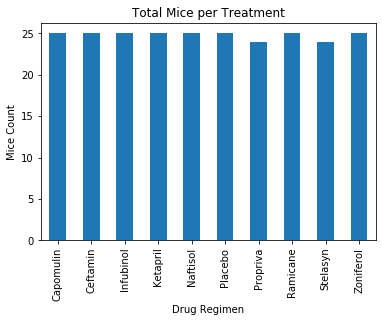

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# filter dataframe
mice_per_treatment = remove_dup_df.groupby(["Drug Regimen"]).nunique()["Mouse ID"]

mice_per_treatment.plot(kind="bar", figsize=(6,4))

# format chart
plt.title("Total Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")

# show chart and set layout
plt.show()
plt.tight_layout()


Text(0, 0.5, 'Mice Count')

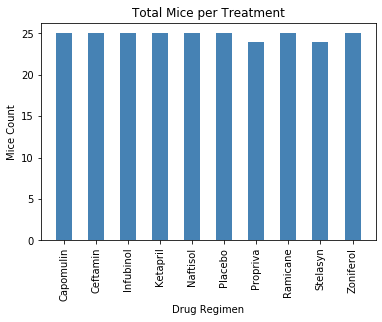

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(mice_per_treatment))
mice_count = [25,25,25,25,25,25,24,25,24,25]
drug_regimen = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
# create bar plot
plt.bar(x_axis,mice_count, color='steelblue', alpha=1, align='center', width=0.5)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimen, rotation = "vertical")
# format bar plot
plt.title("Total Mice per Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Mice Count")


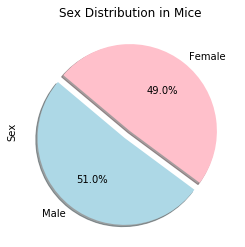

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Filter the DataFrame down only to those columns to chart
female_vs_male = remove_dup_df["Sex"].value_counts()

# create pie plot using pandas 
female_vs_male.plot(kind="pie", figsize=(10,4), colors=["lightblue","pink"], counterclock=True, autopct='%1.1f%%', 
                    shadow=True, explode= (0.1,0), startangle=140)

# format chart
plt.title("Sex Distribution in Mice")
plt.show()
plt.tight_layout()


Text(0.5, 1.0, 'Sex Distribution in Mice')

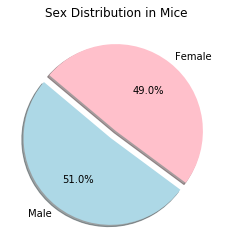

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_vs_male = remove_dup_df["Sex"].value_counts()

# Labels for the sections of our pie chart
labels = ["Male", "Female"]
# The values of each section of the pie chart
sex_count = female_vs_male 

# The colors of each section of the pie chart
colors = ["lightblue", "pink"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(sex_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Sex Distribution in Mice")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
best_regimens = remove_dup_df[remove_dup_df["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]

treatments_df = best_regimens[["Mouse ID","Drug Regimen","Tumor Volume (mm3)","Timepoint"]]
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
pull_last = treatments_df.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
pull_last_df = pull_last.to_frame()
pull_last_df

Tumor Volume (mm3)
Drug Regimen Mouse ID                    
Capomulin    b128               38.982878
             b742               38.939633
             f966               30.485985
             g288               37.074024
             g316               40.159220
...                                   ...
Ramicane     s508               30.276232
             u196               40.667713
             w678               43.166373
             y449               44.183451
             z578               30.638696

[100 rows x 1 columns]

In [16]:
final_df = pull_last_df.reset_index()

# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_df.loc[treatment==final_df["Drug Regimen"]]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
# seperate list into individual dataframes 
cap_tumor_vol = tumor_vol_data[0]
ram_tumor_vol = tumor_vol_data[1]
inf_tumor_vol = tumor_vol_data[2]
cef_tumor_vol = tumor_vol_data[3]
# Determine outliers using upper and lower bounds
#outliers for capomulin 
tumor_volume1 = cap_tumor_vol["Tumor Volume (mm3)"]
cap_quartiles = tumor_volume1.quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq-cap_lowerq
cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers for the regimen Capomulin.")
print(f"Values above {cap_upper_bound} could be outliers for the regimen Capomulin.")
#outliers for ramicane 
tumor_volume2 = ram_tumor_vol["Tumor Volume (mm3)"]
ram_quartiles = tumor_volume2.quantile([.25,.5,.75])
ram_lowerq =ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq-ram_lowerq
ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers for the regimen Ramicane.")
print(f"Values above {ram_upper_bound} could be outliers for the regimen Ramicane.")
#outliers for infubinol 
tumor_volume3 = inf_tumor_vol["Tumor Volume (mm3)"]
inf_quartiles = tumor_volume3.quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq-inf_lowerq
inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers for the regimen Infubinol.")
print(f"Values above {inf_upper_bound} could be outliers for the regimen infubinol.")
#outliers for ceftamin
tumor_volume4 = cef_tumor_vol["Tumor Volume (mm3)"]
cef_quartiles = tumor_volume4.quantile([.25,.5,.75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq-cef_lowerq
cef_lower_bound = cef_lowerq - (1.5*cef_iqr)
cef_upper_bound = cef_upperq + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers for the regimen Ceftamin.")
print(f"Values above {cef_upper_bound} could be outliers for the regimen Ceftamin.")

Values below 20.70456164999999 could be outliers for the regimen Capomulin.
Values above 51.83201549 could be outliers for the regimen Capomulin.
Values below 17.912664470000003 could be outliers for the regimen Ramicane.
Values above 54.30681135 could be outliers for the regimen Ramicane.
Values below 36.83290494999999 could be outliers for the regimen Infubinol.
Values above 82.74144559000001 could be outliers for the regimen infubinol.
Values below 25.355449580000002 could be outliers for the regimen Ceftamin.
Values above 87.66645829999999 could be outliers for the regimen Ceftamin.


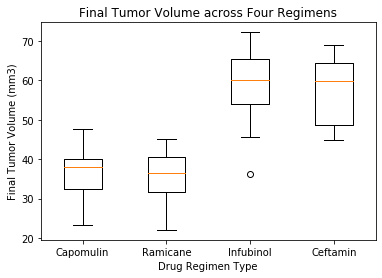

In [39]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#create box plot for all regimens 
regimen_plot = [cap_tumor_vol["Tumor Volume (mm3)"], ram_tumor_vol["Tumor Volume (mm3)"], 
                inf_tumor_vol["Tumor Volume (mm3)"], cef_tumor_vol["Tumor Volume (mm3)"]]
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume across Four Regimens")
ax1.boxplot(regimen_plot)
ax1.set_xlabel("Drug Regimen Type")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.show()

## Line and Scatter Plots

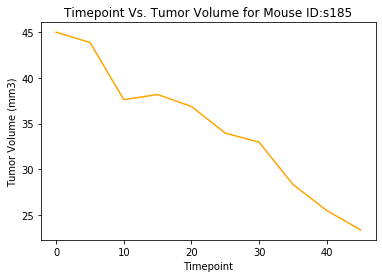

In [40]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mice_time = remove_dup_df[remove_dup_df["Drug Regimen"].isin(["Capomulin"])]
cap_vol_df = mice_time[["Drug Regimen","Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
specific_mouse = cap_vol_df[cap_vol_df["Mouse ID"].isin(["s185"])]
specific_mouse.set_index("Drug Regimen")
line_x_axis = specific_mouse["Timepoint"]
line_e_x = specific_mouse["Tumor Volume (mm3)"]
# create and format line graph
plt.plot(line_x_axis,line_e_x, color= "orange")
plt.title("Timepoint Vs. Tumor Volume for Mouse ID:s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
# show graph
plt.show()


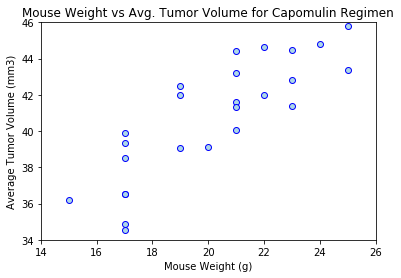

In [41]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mice_time
#reorganize dataframe to pull needed values 
mice_weight_df = mice_time[["Drug Regimen","Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
vol_group = mice_weight_df.groupby(['Mouse ID'])
avg_vol = vol_group["Tumor Volume (mm3)"].mean()
avg_vol_df = avg_vol.to_frame() 
weight_vs_tumor_df = pd.merge(avg_vol_df, mice_weight_df, on="Mouse ID")
new_weight_tumor_df = weight_vs_tumor_df.rename(columns={"Tumor Volume (mm3)_x": "Average Tumor Volume"})
del new_weight_tumor_df["Tumor Volume (mm3)_y"]
# remove duplicate rows 
last_weight_tumor_df = new_weight_tumor_df.drop_duplicates(subset="Mouse ID", keep="last", inplace=False)
last_weight_tumor_df

# pull out values for scatter plot 
weight = [last_weight_tumor_df["Weight (g)"]]
avg_tumor_vol = [last_weight_tumor_df["Average Tumor Volume"]]

#create scatter polt 
plt.scatter(weight, avg_tumor_vol, marker="o", facecolors="lightblue", edgecolors="blue")
plt.title("Mouse Weight vs Avg. Tumor Volume for Capomulin Regimen")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34,46)
plt.xlim(14,26)
plt.show()


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


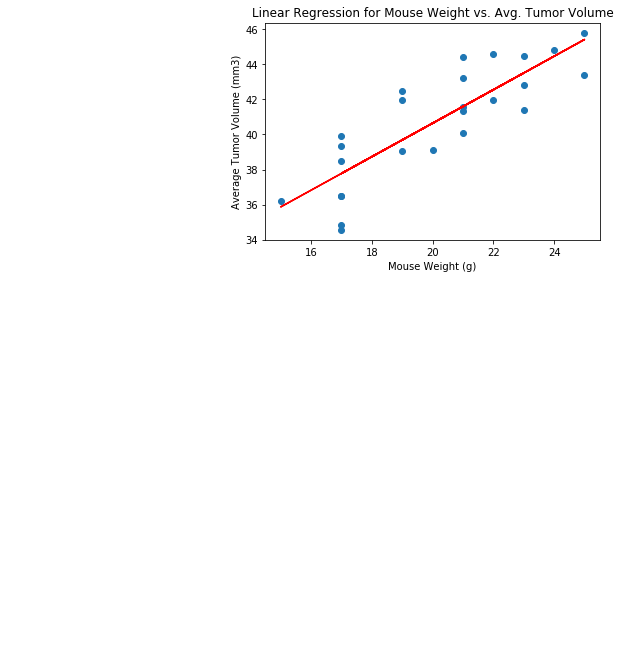

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# calculate correlation coefficient 
mice_weight = last_weight_tumor_df.iloc[:,3]
tumor_volume = last_weight_tumor_df.iloc[:,1]
correlation = st.pearsonr(mice_weight,tumor_volume)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
# calculate linear regression and plot 
x_values = mice_weight
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression for Mouse Weight vs. Avg. Tumor Volume")
plt.show()